# The Daily Show with Jon Stewart Analysis

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns
from textblob import TextBlob
import statsmodels.formula.api as smf

plt.rcParams['figure.figsize'] = (20,6)

from bokeh.plotting import output_notebook, show
output_notebook(hide_banner=True)

from IPython.display import display, HTML
def printb(*args):
    s = " ".join([str(x) for x in args])
    display(HTML('<strong>%s</strong>' % s))

In [2]:
episode_list = pd.read_csv("../data/imdb_episode_list.csv")
metadata = pd.read_csv("../data/comedy_central_metadata.csv", thousands=",")
metadata['air_date'] = pd.to_datetime(metadata.air_date, unit='s')
metadata['publish_date'] = pd.to_datetime(metadata.publish_date, unit='s')

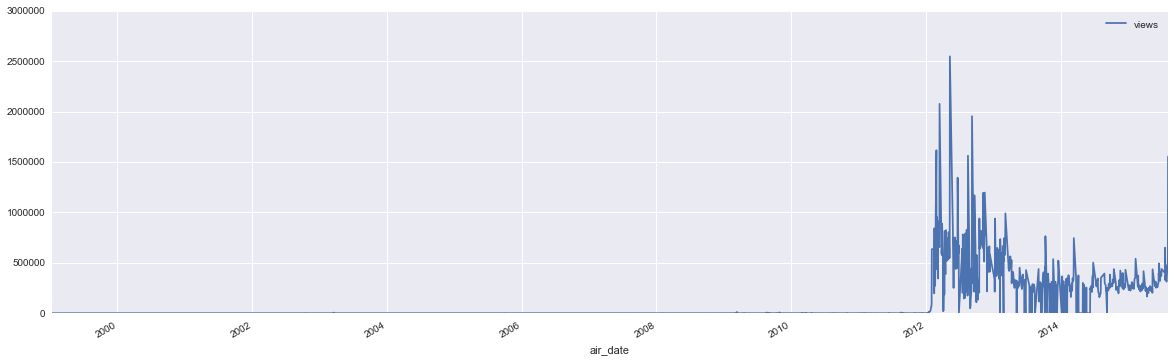

In [3]:
metadata.plot(x='air_date', y='views')

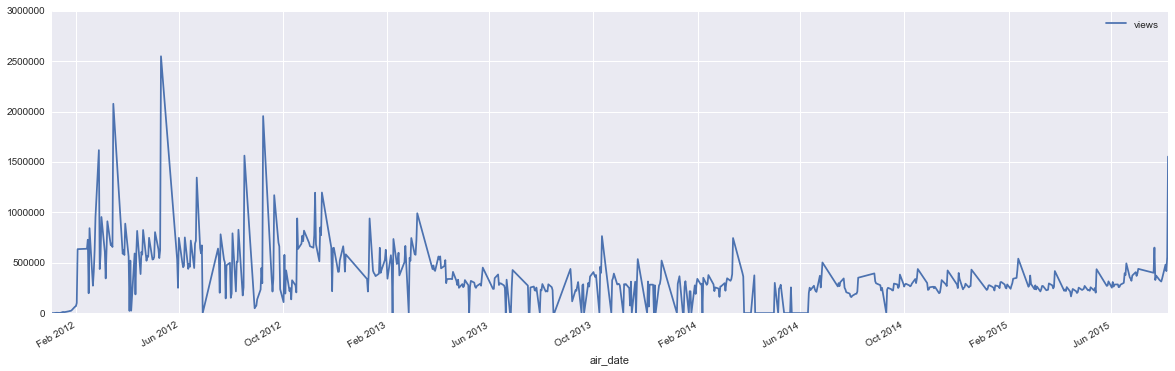

In [4]:
metadata[metadata.air_date > '2012'].plot(x='air_date', y='views')